In [23]:
import numpy as np
import librosa
import librosa.display
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [4]:
def load_data(data_path):
    X = []
    y = []
    for folder in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            emotion = folder  # assuming folder name is the emotion label
            y.append(emotion)
            
            # Load the audio file
            audio, sr = librosa.load(file_path, sr=None)
            
            # Extract MFCC features
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
            mfcc = np.mean(mfcc.T, axis=0)
            X.append(mfcc)
    
    return np.array(X), np.array(y)

# Example: Provide the path to your dataset
data_path = "C:\\Users\\HP\\Documents\\ravdess data"
X, y = load_data(data_path)



In [5]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)




In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)


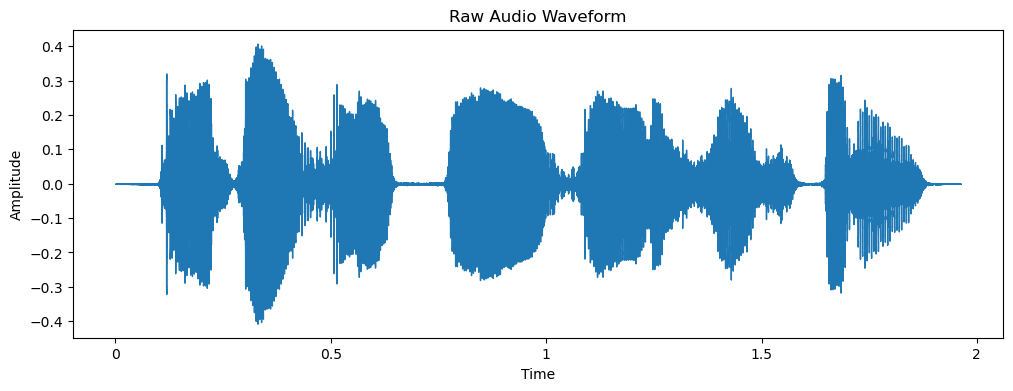

In [29]:


def load_raw_audio(audio_path):
    # Load the audio file
    audio, sr = librosa.load(audio_path, sr=None)
    return audio, sr

def plot_audio(audio, sr):
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(audio, sr=sr)
    plt.title('Raw Audio Waveform')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

def play_audio(audio, sr):
    display(Audio(data=audio, rate=sr))

# Example usage:
audio_path = "C:\\Users\\HP\\Documents\\ravdess data\\sad emotion\\child_12.wav"  # Replace with your audio file path
audio, sr = load_raw_audio(audio_path)
plot_audio(audio, sr)
play_audio(audio, sr)


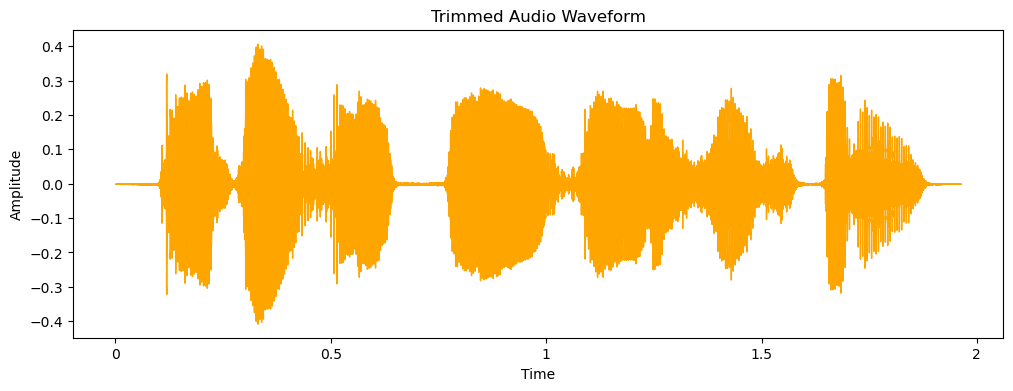

In [36]:
def load_raw_audio(audio_path):
    # Load the audio file
    audio, sr = librosa.load(audio_path, sr=None)
    return audio, sr

def plot_audio(audio, sr, title='Audio Waveform', color='b'):
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(audio, sr=sr, color=color)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

def play_audio(audio, sr):
    display(Audio(data=audio, rate=sr))

def trim_to_interval(audio_path, start_sec=0, end_sec=10):
    # Load the audio file
    audio, sr = librosa.load(audio_path, sr=None)
    
    # Convert seconds to samples
    start_sample = int(start_sec * sr)
    end_sample = int(end_sec * sr)
    
    # Trim the audio to the specified interval
    trimmed_audio = audio[start_sample:end_sample]
    
    return trimmed_audio, sr

# Example usage:
audio_path =  "C:\\Users\\HP\\Documents\\ravdess data\\sad emotion\\child_12.wav"  # Replace with your audio file path
start_time = 0  # Start at the beginning
end_time = 10 # End at 10 seconds
trimmed_audio, sr = trim_to_interval(audio_path, start_time, end_time)

# Visualize and play the trimmed audio
plot_audio(trimmed_audio, sr, title='Trimmed Audio Waveform', color='orange')
play_audio(trimmed_audio, sr)


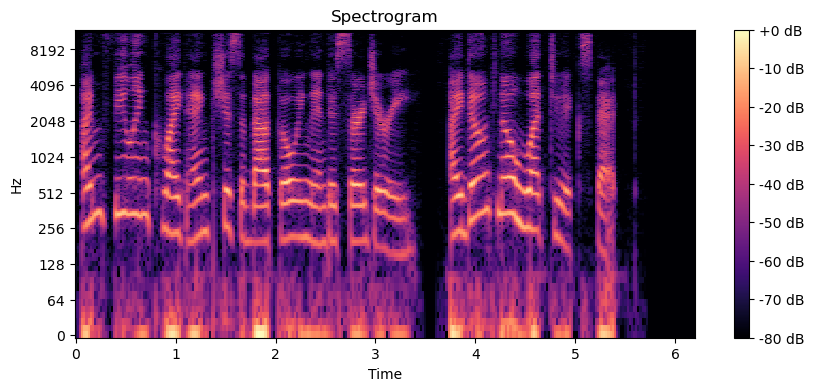

In [24]:
def generate_spectrogram(audio_path):
    # Load the audio file
    audio, sr = librosa.load(audio_path, sr=None)
    
    # Generate the spectrogram
    stft = np.abs(librosa.stft(audio))
    
    # Convert the spectrogram to decibels
    spectrogram = librosa.amplitude_to_db(stft, ref=np.max)
    
    return spectrogram, sr

# Example usage:
audio_path = "C:\\Users\\HP\\Documents\\ravdess data\\anxity emtion\\child_06.wav"  # Replace with your audio file path
spectrogram, sr = generate_spectrogram(audio_path)

# Display the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


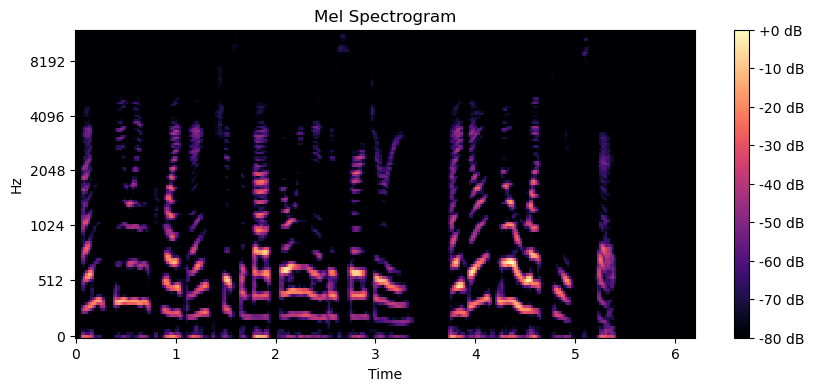

In [25]:
def generate_mel_spectrogram(audio_path, n_mels=128):
    # Load the audio file
    audio, sr = librosa.load(audio_path, sr=None)
    
    # Generate the mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
    
    # Convert the mel spectrogram to decibels
    mel_spectrogram_db = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
    
    return mel_spectrogram_db, sr

# Example usage:
mel_spectrogram, sr = generate_mel_spectrogram(audio_path)

# Display the mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Flatten, Dropout, Input

# Define the model
model = Sequential()

# Input Layer (Explicitly define the input shape)
model.add(Input(shape=(X_train.shape[1], 1)))

# CNN Layer
model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM Layer
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.3))

# Fully Connected Layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 40, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,653 (420.52 KB)

 Trainable params: 107,653 (420.52 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 1.7883 - val_accuracy: 0.3333 - val_loss: 1.5676
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.3333 - loss: 1.5775 - val_accuracy: 0.0000e+00 - val_loss: 1.6103
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.1667 - loss: 1.5161 - val_accuracy: 0.0000e+00 - val_loss: 1.6660
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.2500 - loss: 1.5780 - val_accuracy: 0.0000e+00 - val_loss: 1.6914
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.3333 - loss: 1.5175 - val_accuracy: 0.0000e+00 - val_loss: 1.7027
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3333 - loss: 1.5294 - val_accuracy: 0.0000e+00 - val_loss: 1.6968
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.1667 - loss: 1.6169 - val_accuracy: 0.0000e+00 - val_loss: 1.7031
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.3333 - loss: 1.5584 - val_accuracy

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5000 - loss: 1.1934
Test Accuracy: 50.00%


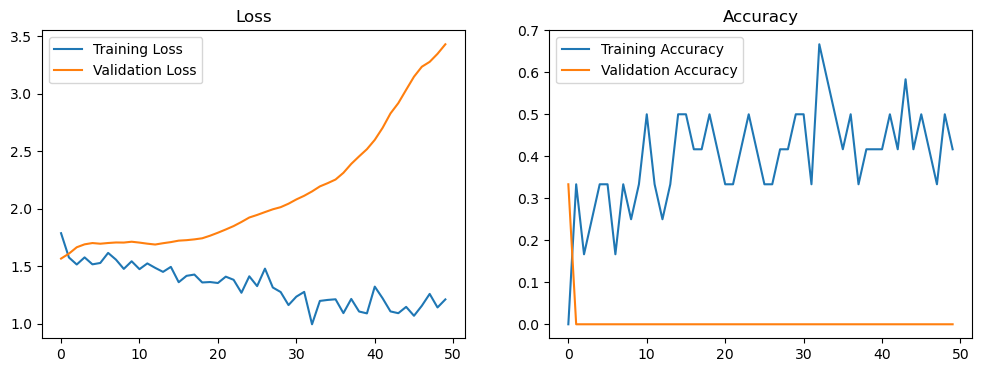

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


In [60]:
def predict_emotion(audio_path):
    audio, sr = librosa.load(audio_path, sr=None)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    mfcc = np.mean(mfcc.T, axis=0)
    mfcc = np.expand_dims(mfcc, axis=0)
    mfcc = np.expand_dims(mfcc, axis=-1)
    
    prediction = model.predict(mfcc)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
    
    return predicted_label[0]

# Example: Test with a new audio file
new_audio_path = "C:\\Users\\HP\\Documents\\ravdess data\\Neutral emotion\\child_19.wav"
predicted_emotion = predict_emotion(new_audio_path)
print(f'Predicted Emotion: {predicted_emotion}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Emotion: anxity emtion
